## 課題1

正規乱数を生成するプログラムを作れ。  
また、そのプログラムを用いて $𝜇 = 0$, $𝜎 = 1$ の正規分布に従う正規分布を1000個生成し、その正規確率をヒストグラムで表示せよ。  
階級数は30とする。

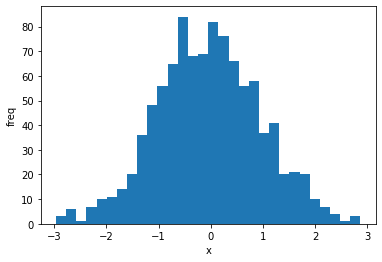

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

# 正規乱数を生成(𝜇 = 0, 𝜎 = 1)
x = np.random.normal(0, 1, 1000)

# 表示
plt.hist(x, 30)
plt.xlabel('x')
plt.ylabel('freq')
plt.show()

## 課題2

マルコフチェインアルゴリズムを実装せよ。最大繰り返し回数は100回とする。
- 100回中、最も$𝑓(𝑥)=0$に近い$𝑥$と、その$𝑓(𝑥)$の値を答えよ。
- 実装のためのプログラム言語は問わない。例えばExcelでも良い。

In [2]:
def f(x):
    return x**3 + 2*x**2 - 5*x + 6

# 閾値
th = 10e-4
# 初期値
x0 = np.random.rand()
# カウンタ
t = 0

while (f(x0) > th and t <= 100):
    t = t + 1
    y = x0 + np.random.normal(0,1)
    p = np.random.rand()
    r = np.random.rand()
    if r < p:
        x0 = y
    
print("\n試行回数:{}".format(t))
print("x = {}".format(x0))
print("f(x) = {}".format(f(x0)))



試行回数:101
x = 10.067491639364816
f(x) = 1178.7557705041158


In [6]:
# 試行回数増やしてみる

i = 0
x0 = np.random.rand()

df = pd.DataFrame(columns=['x', 'fx'])
x_list = []
fx_list = []

while ( i <= 100):
    i = i + 1
    # 初期値
    x0 = np.random.rand()
    # カウンタ
    t = 0
    while True:
        t = t + 1
        y = x0 + np.random.normal(0,1)
        p = np.random.rand()
        r = np.random.rand()
        if r < p:
            x0 = y
        if f(x0) <= th or t > 100:
            break
        else:
            x_list.append(x0)
            fx_list.append(f(x0))

df['x'] = x_list
df['fx'] = fx_list
display(df.loc[(df['fx'] > -1) & (df['fx'] < 1)])

,x,fx
4248,-3.745629,0.237437
4249,-3.745629,0.237437
4250,-3.745629,0.237437
4251,-3.745629,0.237437
5683,-3.722186,0.750619


## 課題3

進研ゼミによれば，香川大学工学部電子・情報工学科の2014年度前期日程の入試偏差値は53でした。  
では，進研ゼミ模試全受験者のうち，上位何％までがこの学科の合格圏内といえるでしょう？  
ヒント：標準化変量 $𝑧_𝑖 = (𝑇_𝑖 − 50)/10 =$

In [4]:
T = 53
z = (T-50)/10
print(z)

0.3


分布表によると
標準変化量0.3の個体は、全体の中で上位38.21%にいる。